69997


/tmp/ipykernel_10253/3769012547.py:52: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, signal = scipy.io.wavfile.read(wav_file_path)


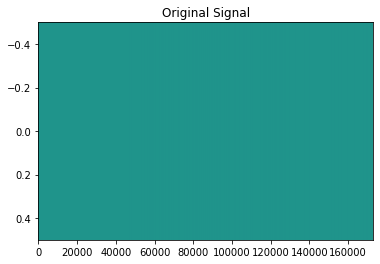

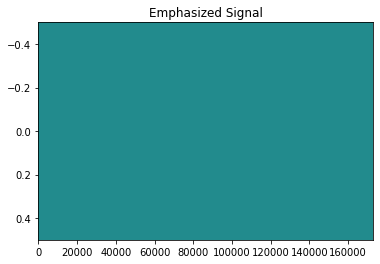

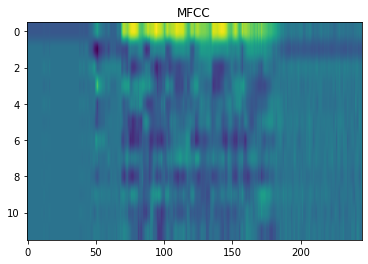

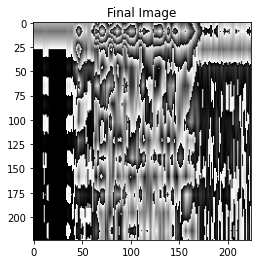

In [14]:
import os
import numpy as np
import scipy.io.wavfile
import librosa
from skimage.transform import resize
import matplotlib.pyplot as plt
import scipy.misc

# Constants
kPRE_EMPHASIS_COEFF = 0.97
sample_rate = 70000
max_duration = 0.9999583333333333
max_samples = int(max_duration * sample_rate)
print(max_samples)
def pad_signal(signal, target_len):
    num_zeros_needed = target_len - len(signal)
    if num_zeros_needed > 0:
        num_zeros_front = np.random.randint(num_zeros_needed)
        num_zeros_back = num_zeros_needed - num_zeros_front
        return np.pad(signal, (num_zeros_front, num_zeros_back), mode='constant')
    else:
        return signal

def pre_emphasis(signal):
    first_amp = signal[0]
    all_amps_without_first = signal[1:]
    all_amps_without_last = signal[:-1]
    emphasized_signal = np.append(first_amp, all_amps_without_first - kPRE_EMPHASIS_COEFF * all_amps_without_last)
    return emphasized_signal

def pipeline(signal):
    emphasized_signal = pre_emphasis(signal)
    
    lifted_mfcc = librosa.feature.mfcc(
        y=emphasized_signal.astype(float), 
        sr=sample_rate, 
        n_mfcc=12, 
        dct_type=2, 
        norm='ortho', 
        lifter=22,
        n_fft=int(sample_rate * 0.025),
        hop_length=int(sample_rate * 0.01),
        power=2,
        center=False,
        window='hamming',
        n_mels=40
    )

    return lifted_mfcc

def preprocess_and_display(wav_file_path):
    _, signal = scipy.io.wavfile.read(wav_file_path)
    signal = pad_signal(signal, target_len=max_samples)
    
    # Display the original signal
    plt.imshow(signal.reshape(1, -1), aspect='auto', cmap='viridis')
    plt.title('Original Signal')
    plt.show()

    # Display the signal after pre-emphasis
    emphasized_signal = pre_emphasis(signal)
    plt.imshow(emphasized_signal.reshape(1, -1), aspect='auto', cmap='viridis')
    plt.title('Emphasized Signal')
    plt.show()

    # Display the MFCC after processing
    mfc = pipeline(signal)
    plt.imshow(mfc, aspect='auto', cmap='viridis')
    plt.title('MFCC')
    plt.show()

    # Resize for compatibility with a pre-trained ResNet-34
    mfc_3d = resize(np.rollaxis(np.array([mfc] * 3), 0, 3), (224, 224, 3))
    
    # Display the final image
    plt.imshow(mfc_3d.astype(np.uint8))
    plt.title('Final Image')
    plt.show()

# Example usage:
wav_file_path = 'dataset/Female_Actor_02_03-01-01-01-01-02-02.wav'
preprocess_and_display(wav_file_path)


In [15]:
%debug

import os
import numpy as np
import scipy.io.wavfile
import librosa
from skimage.transform import resize
import imageio

# Constants
kPRE_EMPHASIS_COEFF = 0.97
sample_rate = 70000
max_duration = 0.9999583333333333
max_samples = int(max_duration * sample_rate)

def pad_signal(signal, target_len):
    num_zeros_needed = target_len - len(signal)
    if num_zeros_needed > 0:
        num_zeros_front = np.random.randint(num_zeros_needed)
        num_zeros_back = num_zeros_needed - num_zeros_front
        return np.pad(signal, (num_zeros_front, num_zeros_back), mode='constant')
    else:
        return signal

def pre_emphasis(signal):
    first_amp = signal[0]
    all_amps_without_first = signal[1:]
    all_amps_without_last = signal[:-1]
    emphasized_signal = np.append(first_amp, all_amps_without_first - kPRE_EMPHASIS_COEFF * all_amps_without_last)
    return emphasized_signal

def pipeline(signal):
    emphasized_signal = pre_emphasis(signal)
    
    lifted_mfcc = librosa.feature.mfcc(
        y=emphasized_signal.astype(float), 
        sr=sample_rate, 
        n_mfcc=12, 
        dct_type=2, 
        norm='ortho', 
        lifter=22,
        n_fft=int(sample_rate * 0.025),
        hop_length=int(sample_rate * 0.01),
        power=2,
        center=False,
        window='hamming',
        n_mels=40
    )

    return lifted_mfcc

def preprocess_and_save_as_image(wav_file_path, save_directory):
    _, signal = scipy.io.wavfile.read(wav_file_path)
    signal = pad_signal(signal, target_len=max_samples)
    # Resize for compatibility with a pre-trained ResNet-34
    mfc_3d = resize(np.rollaxis(np.array([pipeline(signal)] * 3), 0, 3), (224, 224, 3))
    # Save the final image using imageio
    save_filename = os.path.join(save_directory, os.path.splitext(os.path.basename(wav_file_path))[0] + '.jpg')
    imageio.imwrite(save_filename, mfc_3d.astype(np.uint8))

# Example usage:
input_directory = 'dataset'
output_directory = 'mfc_data'

for filename in os.listdir(input_directory):
    if filename.endswith('.wav'):
        wav_file_path = os.path.join(input_directory, filename)
        preprocess_and_save_as_image(wav_file_path, output_directory)


ERROR:root:No traceback has been produced, nothing to debug.
/tmp/ipykernel_10253/24304685.py:53: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, signal = scipy.io.wavfile.read(wav_file_path)


In [ ]:
import os
import numpy as np
import scipy.io.wavfile
import librosa
from skimage.transform import resize
import imageio

# Constants
kPRE_EMPHASIS_COEFF = 0.97
sample_rate = 70000
max_duration = 0.9999583333333333
max_samples = int(max_duration * sample_rate)

def pad_signal(signal, target_len):
    num_zeros_needed = target_len - len(signal)
    if num_zeros_needed > 0:
        num_zeros_front = np.random.randint(num_zeros_needed)
        num_zeros_back = num_zeros_needed - num_zeros_front
        return np.pad(signal, (num_zeros_front, num_zeros_back), mode='constant')
    else:
        return signal

def pre_emphasis(signal):
    first_amp = signal[0]
    all_amps_without_first = signal[1:]
    all_amps_without_last = signal[:-1]
    emphasized_signal = np.append(first_amp, all_amps_without_first - kPRE_EMPHASIS_COEFF * all_amps_without_last)
    return emphasized_signal

def pipeline(signal):
    emphasized_signal = pre_emphasis(signal)
    
    lifted_mfcc = librosa.feature.mfcc(
        y=emphasized_signal.astype(float), 
        sr=sample_rate, 
        n_mfcc=12, 
        dct_type=2, 
        norm='ortho', 
        lifter=22,
        n_fft=int(sample_rate * 0.025),
        hop_length=int(sample_rate * 0.01),
        power=2,
        center=False,
        window='hamming',
        n_mels=40
    )

    return lifted_mfcc

def preprocess_and_save_as_image(wav_file_path, save_directory):
    _, signal = scipy.io.wavfile.read(wav_file_path)
    signal = pad_signal(signal, target_len=max_samples)

    # Chuyển đổi tên file WAV thành tên file ảnh
    img_file_name = os.path.splitext(os.path.basename(wav_file_path))[0] + '.jpg'

    # Tạo đường dẫn lưu trữ ảnh
    img_save_path = os.path.join(save_directory, img_file_name)

    # Chuyển đổi và lưu ảnh sử dụng imageio
    mfc_3d = resize(np.rollaxis(np.array([pipeline(signal)] * 3), 0, 3), (224, 224, 3))
    imageio.imwrite(img_save_path, mfc_3d.astype(np.uint8))
    print(f"Processed: {wav_file_path} -> {img_save_path}")

# Đường dẫn đầu vào và đầu ra của bạn
input_directory = 'male'
output_directory = 'mfc_data'

# Kiểm tra và tạo thư mục đầu ra nếu chưa tồn tại
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Xử lý tất cả các file trong thư mục đầu vào
for filename in os.listdir(input_directory):
    if filename.endswith('.wav'):
        wav_file_path = os.path.join(input_directory, filename)
        preprocess_and_save_as_image(wav_file_path, output_directory)


Processed: male/Male_Actor_01_03-01-03-01-01-01-01.wav_chunk1.wav -> mfc_data/Male_Actor_01_03-01-03-01-01-01-01.wav_chunk1.jpg
Processed: male/Male_Actor_01_03-01-03-01-01-02-01.wav_chunk1.wav -> mfc_data/Male_Actor_01_03-01-03-01-01-02-01.wav_chunk1.jpg
Processed: male/Male_Actor_01_03-01-03-01-02-01-01.wav_chunk1.wav -> mfc_data/Male_Actor_01_03-01-03-01-02-01-01.wav_chunk1.jpg
Processed: male/Male_Actor_01_03-01-03-02-01-01-01.wav_chunk1.wav -> mfc_data/Male_Actor_01_03-01-03-02-01-01-01.wav_chunk1.jpg
Processed: male/Male_Actor_01_03-01-03-02-01-01-01.wav_chunk2.wav -> mfc_data/Male_Actor_01_03-01-03-02-01-01-01.wav_chunk2.jpg
Processed: male/Male_Actor_01_03-01-03-02-01-02-01.wav_chunk1.wav -> mfc_data/Male_Actor_01_03-01-03-02-01-02-01.wav_chunk1.jpg
Processed: male/Male_Actor_01_03-01-03-02-01-02-01.wav_chunk2.wav -> mfc_data/Male_Actor_01_03-01-03-02-01-02-01.wav_chunk2.jpg
Processed: male/Male_Actor_01_03-01-03-02-02-01-01.wav_chunk1.wav -> mfc_data/Male_Actor_01_03-01-03-02-